In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split as split_data

# Grab data from UCI Archive
df = pd.read_csv("./data/forest-fires.csv")
df.columns = [ "x_coord", "y_coord", "month", "day", "ffmc", "dmc", "dc", "isi", "temp",
              "rh", "wind", "rain", "area" ]

df.head()

,x_coord,y_coord,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [2]:
df["month"].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [3]:
mapping = {
    "jan": 3,
    "feb": 3,
    "mar": 0,
    "apr": 0,
    "may": 0,
    "jun": 1,
    "jul": 1,
    "aug": 1,
    "sep": 2,
    "oct": 2,
    "nov": 2,
    "dec": 3
}

for i, row in df.iterrows():
    df.ix[i, "season"] = mapping[row["month"]]

df.head()

/home/svganesh/.pyenv/versions/3.5.3/lib/python3.5/site-packages/ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


,x_coord,y_coord,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area,season
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,2.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,2.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["month"] = le.fit_transform(df["month"])
df["day"] = le.fit_transform(df["day"])

df.head()

,x_coord,y_coord,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area,season
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,2.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,2.0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0


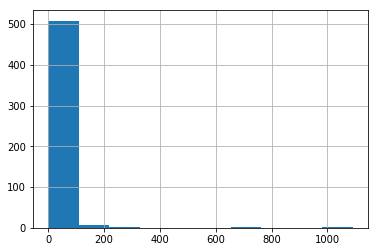

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

df["ln_area"] = np.log(df["area"] + 1)

df["area"].hist()

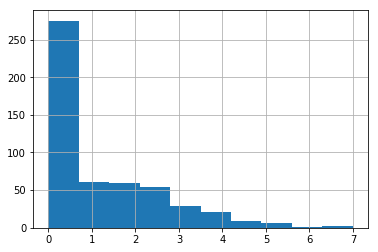

In [6]:
df["ln_area"].hist()

In [7]:
df.pop("area")

df.head()

,x_coord,y_coord,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,season,ln_area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,2.0,0.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,2.0,0.0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0


In [8]:
y = df.pop("ln_area").astype(int)
X = df

X.head()

,x_coord,y_coord,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,season
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,2.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,2.0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [9]:
X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.3, random_state=17)

X_train.head()

,x_coord,y_coord,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,season
86,1,2,11,4,92.9,137.0,706.4,9.2,25.4,27,2.2,0.0,2.0
422,8,6,5,3,88.9,263.1,795.9,5.2,29.3,27,3.6,0.0,1.0
76,9,9,3,0,86.6,13.2,43.0,5.3,15.7,43,3.1,0.0,3.0
150,6,5,6,0,92.5,56.4,433.3,7.1,23.2,39,5.4,0.0,1.0
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [10]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor

pipe = Pipeline([
    ("reduce_dim", SelectKBest(chi2, k=4)),
    ("model", XGBRegressor(learning_rate=0.1, n_estimators=100))
])

/home/svganesh/.pyenv/versions/3.5.3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
skb = SelectKBest(chi2, k=4)
res = skb.fit_transform(X_train, y_train)

pd.DataFrame(res).head()

,0,1,2,3
0,11.0,137.0,706.4,27.0
1,5.0,263.1,795.9,27.0
2,3.0,13.2,43.0,43.0
3,6.0,56.4,433.3,39.0
4,7.0,51.3,102.2,99.0


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

params = [
    {
        "model__max_depth": [3, 4, 5, 8, 10],
        "model__learning_rate": [0.1, 0.05, 0.01],
        "model__n_estimators": [100, 300, 500]
    }
]

scorer = make_scorer(mean_squared_error, False)

clf = GridSearchCV(pipe, cv=5, n_jobs=-1, param_grid=params, scoring=scorer)
clf.fit(X_train, y_train)

print(clf.best_params_)

# clf.fit(X_train, y_train)
# print(np.sqrt(mean_squared_error(y_test, clf.predict(X_test))))

{'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 100}


In [21]:
clf = Pipeline([
    ("reduce_dim", SelectKBest(chi2, k=4)),
    ("model", XGBRegressor(learning_rate=0.1, n_estimators=100))
])
clf.fit(X_train, y_train)

mean_squared_error(y_test, clf.predict(X_test))

1.7547069539518305

In [22]:
y_test, clf.predict(X_test)

(132    0
 71     0
 352    1
 81     0
 70     0
 99     0
 398    0
 477    2
 201    2
 409    0
 109    0
 221    3
 480    1
 97     0
 284    3
 272    1
 159    0
 359    2
 285    0
 58     0
 14     0
 53     0
 471    3
 235    5
 331    2
 343    1
 35     0
 378    0
 203    2
 507    0
       ..
 78     0
 494    2
 222    3
 290    0
 484    3
 288    0
 455    0
 144    0
 247    0
 450    2
 499    2
 223    3
 124    0
 142    0
 28     0
 505    1
 79     0
 211    3
 64     0
 336    0
 347    0
 133    0
 154    0
 227    4
 112    0
 111    0
 243    0
 367    0
 3      0
 274    2
 Name: ln_area, Length: 156, dtype: int64,
 array([ 0.65344751,  0.5949744 ,  1.15347862,  0.93724298,  0.79176897,
         0.4202019 ,  1.06349826,  0.66633809,  0.70290899,  0.50583315,
         1.15084505,  0.47612411,  0.78957182,  0.16872957,  0.54166061,
         0.70004201,  1.07743728,  1.02275491,  0.63747102,  0.56694293,
         2.52443027,  0.48593679,  0.47765246,  0.42020